<a href="https://colab.research.google.com/github/kushum-coder/2501460_kushum/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# ----------------------------------------------
# Problem 1 - bank.csv (Load and Inspect)
# ----------------------------------------------
import pandas as pd

# Step 1: Load bank dataset
bank_df = pd.read_csv("/content/drive/MyDrive/bank1.csv")
print("First few rows of bank.csv:")
print(bank_df.head())

# Step 2: Inspect data
bank_df.info()

# Step 3: Find columns with dtype object
object_cols = bank_df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

# Step 4: Print unique values for object columns
for col in object_cols:
    print(f"{col} unique values: {bank_df[col].unique()}")

# Step 5: Check for null values
print("Null values per column:")
print(bank_df.isnull().sum())


First few rows of bank.csv:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data co

In [22]:
# Drop object columns and save numeric CSV
bank_numeric_df = bank_df.select_dtypes(exclude='object')
bank_numeric_df.to_csv("/content/drive/MyDrive/banknumericdata.csv", index=False)
print("Saved numeric data as banknumericdata.csv")

# Summary statistics
print("Summary statistics of numeric columns:")
print(bank_numeric_df.describe())


Saved numeric data as banknumericdata.csv
Summary statistics of numeric columns:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.00000

In [23]:
# ----------------------------------------------
# Problem 2 - medical_students_dataset.csv
# ----------------------------------------------
med_df = pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv")
print("First few rows of medical_students_dataset.csv:")
print(med_df.head())

# Inspect dataset
med_df.info()
print("Null values per column:")
print(med_df.isnull().sum())


First few rows of medical_students_dataset.csv:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [25]:
# Filling missing values with appropriate methods
med_df['Age'] = med_df['Age'].fillna(med_df['Age'].median())
med_df['Gender'] = med_df['Gender'].fillna(med_df['Gender'].mode()[0])
med_df['Height'] = med_df['Height'].fillna(med_df['Height'].mean())
med_df['Weight'] = med_df['Weight'].fillna(med_df['Weight'].median())
med_df['Blood Type'] = med_df['Blood Type'].fillna(med_df['Blood Type'].mode()[0])
med_df['BMI'] = med_df['BMI'].fillna(med_df['BMI'].mean())
med_df['Temperature'] = med_df['Temperature'].ffill()
med_df['Heart Rate'] = med_df['Heart Rate'].ffill()
med_df['Blood Pressure'] = med_df['Blood Pressure'].fillna(med_df['Blood Pressure'].median())
med_df['Cholesterol'] = med_df['Cholesterol'].fillna(med_df['Cholesterol'].mean())
med_df['Diabetes'] = med_df['Diabetes'].fillna(med_df['Diabetes'].mode()[0])
med_df['Smoking'] = med_df['Smoking'].fillna(med_df['Smoking'].mode()[0])


In [26]:
# Check for duplicate rows
duplicates = med_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates
med_df = med_df.drop_duplicates()
print("Data after removing duplicates:")
print(med_df.head())


Number of duplicate rows: 12804
Data after removing duplicates:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0  26.0    Male  152.069157  47.630941          B  23.338869   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female  174.947103  46.234173          O  23.338869   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No      No  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0           115.0        231.0       No      No  


In [27]:
# ----------------------------------------------
# Problem 3.2.1 - Titanic Dataset
# ----------------------------------------------
titanic_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# Subset columns
subset_df = titanic_df[['Name','Pclass','Sex','Age','Fare','Survived']]
print("Subset of Titanic data:")
print(subset_df.head())

# Filter first-class passengers
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Fare statistics
fare_stats = first_class_df['Fare'].agg(['mean','median','min','max'])
print("Fare statistics for first-class passengers:")
print(fare_stats)


Subset of Titanic data:
                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  
0   7.2500         0  
1  71.2833         1  
2   7.9250         1  
3  53.1000         1  
4   8.0500         0  
Fare statistics for first-class passengers:
mean       84.154687
median     60.287500
min         0.000000
max       512.329200
Name: Fare, dtype: float64


In [28]:
# Count null values in Age
print("Null values in 'Age' column:", first_class_df['Age'].isnull().sum())

# Drop rows with missing Age
first_class_df = first_class_df.dropna(subset=['Age'])
print("Null values after dropping rows:", first_class_df['Age'].isnull().sum())


Null values in 'Age' column: 30
Null values after dropping rows: 0


In [29]:
# One-hot encoding for 'Embarked' column
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)
titanic_df = titanic_df.drop('Embarked', axis=1)
print("First few rows after one-hot encoding Embarked:")
print(titanic_df.head())


First few rows after one-hot encoding Embarked:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9

Mean survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


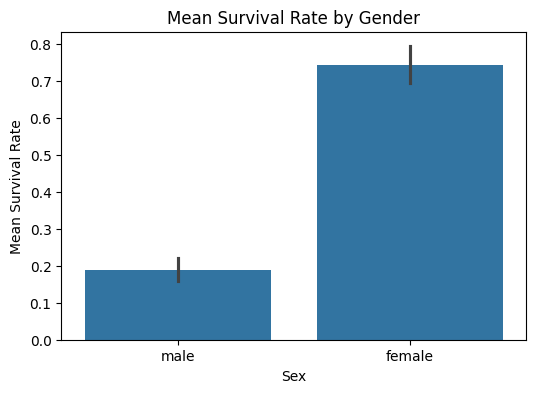

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mean survival rate by Sex
survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender:")
print(survival_by_sex)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()


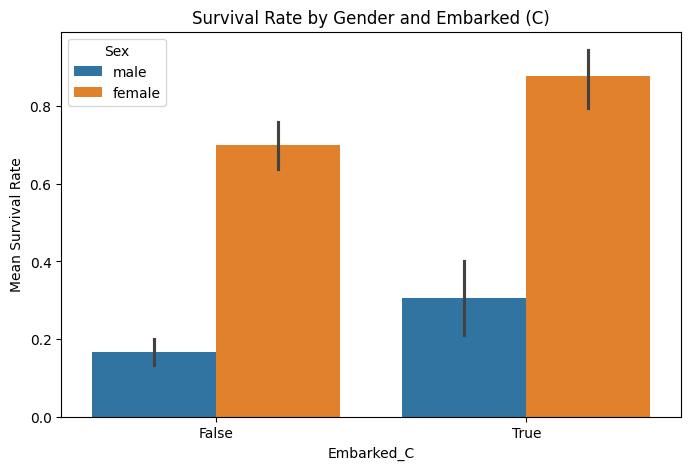

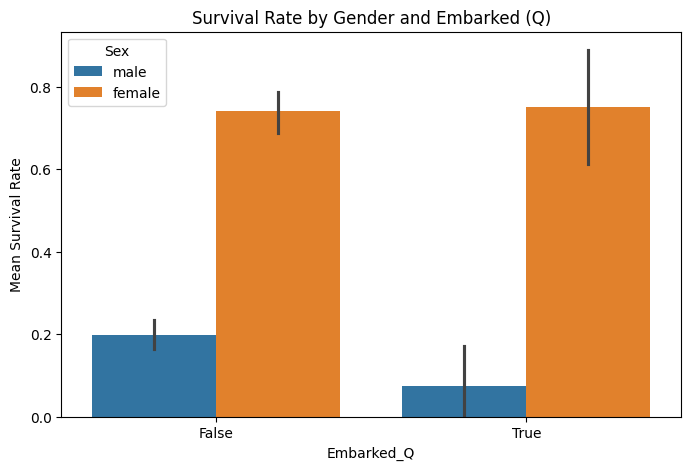

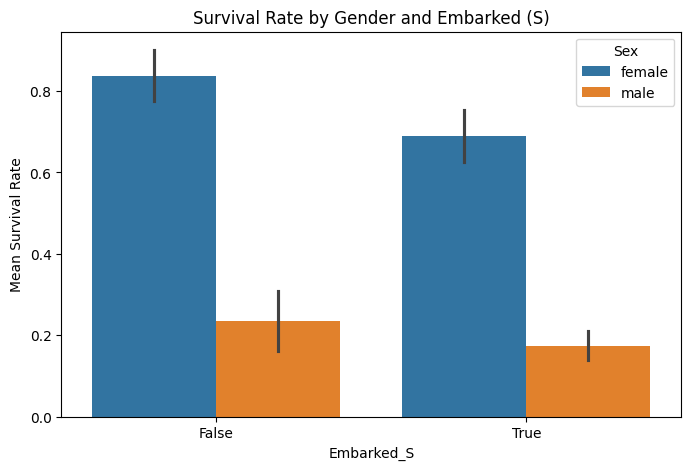

In [31]:
# Visualizations by port of embarkation
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked_C', y='Survived', hue='Sex', data=titanic_df)
plt.title("Survival Rate by Gender and Embarked (C)")
plt.ylabel("Mean Survival Rate")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Embarked_Q', y='Survived', hue='Sex', data=titanic_df)
plt.title("Survival Rate by Gender and Embarked (Q)")
plt.ylabel("Mean Survival Rate")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Embarked_S', y='Survived', hue='Sex', data=titanic_df)
plt.title("Survival Rate by Gender and Embarked (S)")
plt.ylabel("Mean Survival Rate")
plt.show()


/tmp/ipython-input-1915346703.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = titanic_df.pivot_table(index='AgeGroup', columns='Pclass', values='Survived', aggfunc='mean')


Survival rates by Age group and Pclass:
Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


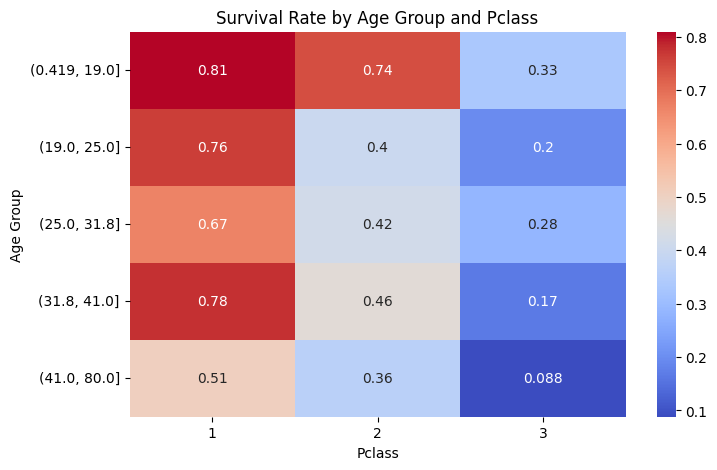

In [32]:
# Drop rows with missing Age
titanic_df = titanic_df.dropna(subset=['Age'])

# Create 5 quantiles for Age
titanic_df['AgeGroup'] = pd.qcut(titanic_df['Age'], 5)

# Pivot table: survival by AgeGroup and Pclass
pivot = titanic_df.pivot_table(index='AgeGroup', columns='Pclass', values='Survived', aggfunc='mean')
print("Survival rates by Age group and Pclass:")
print(pivot)

# Heatmap visualization
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Survival Rate by Age Group and Pclass")
plt.ylabel("Age Group")
plt.show()
